### Acá grafico los datos del plot de Algorry et al 2017 con los datos observacionales de Corsini 2011
### También voy a agregar los datos observacionales de Font et al 2017 y en el mismo plot ubico mi galaxia

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## NEW PLOT

### Datos observacionales

In [2]:
path = '/home/omarioni/'

read    = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/datos_corsini.dat')
l_bar   = read[:,0]
lbar_e  = read[:,1]
lbar_er = read[:,2]
rcor    = read[:,3]
rcor_e  = read[:,4]
rcor_er = read[:,5]

read2    = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/datos_algorry.dat')
lbar_david = read2[:,0]
rcor_david  = read2[:,1]

In [3]:
path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/'
tab1 = np.loadtxt(path + 'tabla1.dat')
dist = tab1[:,0]
r_25 = tab1[:,1]
Mstr = tab1[:,5]

In [4]:
path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/'
tab2 = np.loadtxt(path + 'tabla2.dat')
rCR    = tab2[:,0]
rCR_er = tab2[:,1]
Sbar   = tab2[:,5]
R      = tab2[:,6]
R_er   = tab2[:,7]


path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/'
tab2b = np.loadtxt(path + 'tabla2b.dat')
rho_e  = tab2b[:,0]
rho_er = tab2b[:,1]
rho_b  = tab2b[:,2]
rho_br = tab2b[:,3]

conv = dist*1e3*np.pi/(180.*3600)
rbar = 0.5*(rho_e + rho_b)
rbar2 = rbar*conv

sigma_rbar = 0.5* np.abs(rho_e-rho_b) *conv

rCR2 = rCR*conv
sigma_rCR = rCR_er*conv

### Lbar

In [5]:
path = '/home/omarioni/'

M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime2.dat')
time_M31gd = M31_gd[:,0]
lbar_M31gd = M31_gd[:,1]
#------------------------------------------------------------------------------------------

M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_lbarvstime.dat')
time_M31gs = M31_gs[:,0]
lbar_M31gs = M31_gs[:,1]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_lbarvstime.dat')
time_MWgs = MW_gs[:,0]
lbar_MWgs = MW_gs[:,1]

### Rcorot

In [6]:
path = '/home/omarioni/'
# path = '/home/ornela/PYTHON/'

M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/patternvstime.dat')
time_M31gd  = M31_gd[:,0]
omega_M31gd = M31_gd[:,1]
rcor_M31gd  = M31_gd[:,2]

M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_patternvstime.dat')
time_M31gs  = M31_gs[:,0]
omega_M31gs = M31_gs[:,1]
rcor_M31gs = M31_gs[:,2]

MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_patternvstime.dat')
time_MWgd  = MW_gs[:,0]
omega_MWgs = MW_gs[:,1]
rcor_MWgs  = MW_gs[:,2]

/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


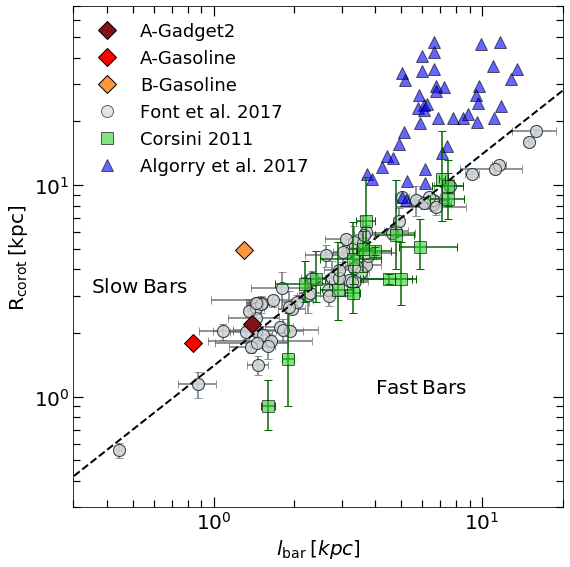

In [7]:
# from __future__ import unicode_literals
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax=fig.add_subplot(111)
AGD, = ax.plot(lbar_M31gd[0], rcor_M31gd[0],'D', markersize=13, mfc='#801414',mec='k',zorder=10, label='A-Gadget2')
AGS, = ax.plot(lbar_M31gs[0], rcor_M31gs[0],'D', markersize=13, mfc='#FF0000',mec='k',zorder=10, label='A-Gasoline')
BGS, = ax.plot(lbar_MWgs[0],  rcor_MWgs[0], 'D', markersize=13, mfc='#FF963E',mec='k',zorder=10, label='B-Gasoline')

font, = ax.plot(rbar2,rCR2,'o', markersize=12, mec='k',mfc='lightgray', alpha=0.6, label='Font et al. 2017')
ax.errorbar(rbar2,rCR2,xerr=sigma_rbar, yerr=sigma_rCR, mfc='lightgray',
            ecolor='dimgray', alpha=0.7, elinewidth=2, fmt='o', markersize=12, capsize=4,zorder=1)

algorry, = ax.plot(lbar_david,rcor_david,'^', markersize=12, mec='k', mfc='b',alpha=0.6, label='Algorry et al. 2017')

corsini, = ax.plot(l_bar,rcor,'s', markersize=12, mec='k',mfc='limegreen', zorder=8, alpha= 0.6, label='Corsini 2011')
ax.errorbar(l_bar,rcor,xerr=[lbar_er,lbar_e], yerr=[rcor_er,rcor_e], ecolor='darkgreen', fmt=' ',
            markersize= 12, capsize=4, zorder=8, mec='k')

ax.plot([0,50],[0,70], 'k--', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_locator(MultipleLocator(1/5.))
ax.xaxis.set_minor_locator(MultipleLocator(1/5.))
# ax.set_yticks([0.5,1.0,2.0,5.0,10,20,50])
ax.set_xlim(0.3,20)
ax.set_ylim(0.3,70)
# ax.set_ylim(1,6)
# ax.set_xlim(0.5,2)
ax.minorticks_on()
ax.tick_params( labelsize=20)#, colors='lightgray')
ax.tick_params('both', length=7, width=1.2,which='minor', direction='in', right='true',top='true')#,colors='w')
ax.tick_params('both', length=10, width=1.2,which='major', direction='in', right='true',top='true')#,colors='w')  
ax.set_xlabel(r'$l_{\mathrm{bar}}\:[kpc]$', fontsize=20)#, color='lightgray')
ax.set_ylabel(r'$\mathrm{R_{corot}\:[kpc]}$',fontsize=20)#, color='lightgray')

ax.text(x = 0.35, y = 3, s = r'$\mathrm{Slow\:Bars}$', fontsize = 20, va = 'bottom', ha = 'left', color='k', style='italic')
ax.text(x = 4, y = 1, s = r'$\mathrm{Fast\:Bars}$', fontsize = 20, va = 'bottom', ha = 'left',  color='k', style='italic')
ax.legend(handles=[AGD,AGS,BGS,font,corsini,algorry],fontsize=18, frameon=False, loc=2)

# ax.arrow( lbar_M31gd[109], rcor_phi[109], lbar_M31gd[0]-lbar_M31gd[109] , rcor_phi[0]-rcor_phi[109],
#          fc='k', ec='k',lw=5, head_width=0.2, head_length=0.3, zorder=10 )

# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Rcor_lbar.pdf', dpi = 100) #xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Rcor_lbar2.pdf', dpi = 100, xxbox_inches='tight')
plt.show()

In [11]:
print lbar_MWgs[0], rcor_MWgs[0]

1.297434 4.936894


In [3]:
# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

# cm = np.loadtxt(path + 'Barras_GdGs/Barras_Gd_/barras/lbar_time.dat')
# time = cm[:,1]
# lbar = cm[:,2]

# print 'lbar=', lbar[0]

data = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime.dat')
lbar_M31gd = data[:,1]

print 'lbar=', lbar_M31gd[0]

cm0      = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/rcorot_phi_time.dat')
# cm0      = np.loadtxt(path + 'Barras_GdGs/Barras_Gd_/barras/rcorot_phi_time.dat')
time0    = cm0[:,1]
rcor_phi = cm0[:,2]

print 'Rcorot=', rcor_phi[0]

read    = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/datos_corsini.dat')
l_bar   = read[:,0]
lbar_e  = read[:,1]
lbar_er = read[:,2]
rcor    = read[:,3]
rcor_e  = read[:,4]
rcor_er = read[:,5]

read2    = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/datos_algorry.dat')
lbar_david = read2[:,0]
rcor_david  = read2[:,1]

lbar= 1.393409
Rcorot= 2.288038


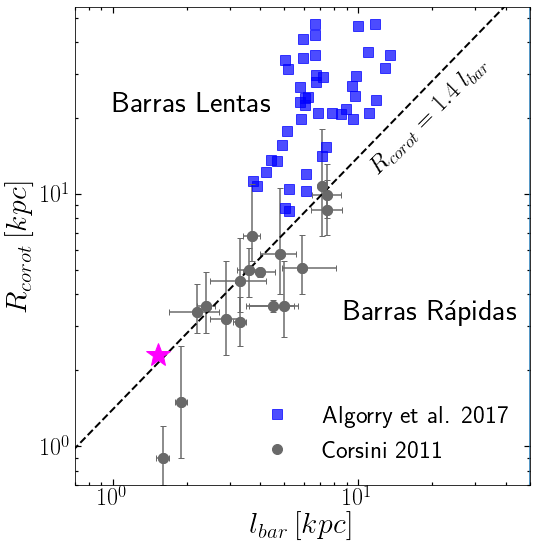

In [9]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

algorry, = ax.plot(lbar_david,rcor_david,'s', markersize=10, color='b',alpha=0.7)
corsini, = ax.plot(l_bar,rcor,'o', markersize=10, color='dimgray') 
ax.errorbar(l_bar,rcor,xerr=[lbar_er,lbar_e], yerr=[rcor_er,rcor_e], color='dimgray', fmt='o', markersize=10, capsize=3)
ax.plot([0,50],[0,70], 'k--', lw=2)
ax.plot(lbar[0],rcor_phi[0],'*', markersize=25, color='magenta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7,50)
ax.set_ylim(0.7,55)
ax.axvline(50)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$l_{bar}\:[kpc]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$R_{corot}\:[kpc]$',fontsize=30)#, color='lightgray')
ax.text(x = 20, y = 20, s = u'$R_{corot}=1.4\;l_{bar}$', fontsize = 25, rotation= 45,  style='italic',
         verticalalignment = 'center', horizontalalignment = 'center')
# ax.text(x = 1, y = 40, s = u'Algorry et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='b')
# ax.text(x = 1, y = 30, s = u'Corsini, 2011', fontsize = 20, va = 'bottom', ha = 'left', color='dimgray')
ax.text(x = 1, y = 20, s = u'Barras Lentas', fontsize = 30, va = 'bottom', ha = 'left', color='k', style='italic')
ax.legend([algorry, corsini],['Algorry et al. 2017', 'Corsini 2011'],fontsize=25, frameon=False, loc=4)
ax.text(x = 20, y = 3, s = u'Barras Rápidas', fontsize = 30, va = 'bottom', ha = 'center',  color='k', style='italic')
                   
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

### Agrego los datos de Font et al 2017


In [62]:
# from matplotlib import cm
# cgen = cm.get_cmap(name="Paired")
# colors = cgen(np.linspace(0, 1, 3))
# colors[0]

array([ 0.65098039,  0.80784314,  0.89019608,  1.        ])

In [4]:
# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

dist = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/distancia.dat')

ydata = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/rcorot.dat')
rcorot = ydata[:,0]
er_cor = ydata[:,1]

xdata = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/Font2017_data/lbar.dat')
lbar_ = xdata[:,0]
er_lbar = xdata[:,1]

conv_rad = pi/(180*3600)

L_bar = lbar_ * dist*1e3 * conv_rad
errorL = er_lbar * dist*1e3 * conv_rad
Rcor = rcorot * dist*1e3 * conv_rad
errorR = er_cor * dist*1e3 * conv_rad

In [5]:
data = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime.dat')
time = data[:,0]
lbar_M31gd = data[:,1]

print 'lbar=', lbar_M31gd[109], 'time=', time[109]
print 'lbar=', lbar_M31gd[186], 'time=', time[186]

# print 'lbar1=', lbar1_M31gd[0], 'lbar2=', lbar2_M31gd[0]

cm0      = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/rcorot_phi_time.dat')
# cm0      = np.loadtxt(path + 'Barras_GdGs/Barras_Gd_/barras/rcorot_phi_time.dat')
time0    = cm0[:,1]
rcor_phi = cm0[:,2]

print 'Rcor=', rcor_phi[109], 'time=', time0[109]
print 'Rcor=', rcor_phi[186], 'time=', time0[186]

lbar= 1.062903 time= 10.960917
lbar= 0.745909 time= 8.869334
Rcor= 1.618178 time= 10.960917
Rcor= 1.483342 time= 8.869334


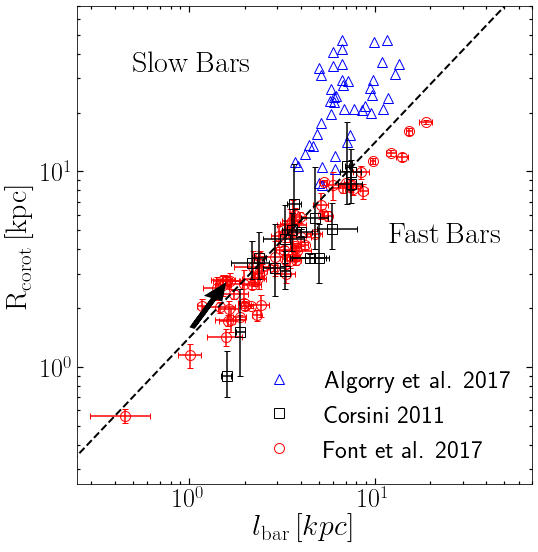

In [9]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

vector_color = ('k', 'b', 'g', 'y', 'orange','r', 'm', 'c','pink','k', 'b', 'g', 'y', 'orange','r', 'm', 'c','pink')
k=0

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

algorry, = ax.plot(lbar_david,rcor_david,'^', markersize=10, mec='b', mfc='none')
font,    = ax.plot(L_bar,Rcor,'o', markersize=10, mec='r',mfc='none')
corsini, = ax.plot(l_bar,rcor,'s', markersize=10, mec='k',mfc='none', zorder=8)
ax.errorbar(L_bar,Rcor,xerr=[errorL,errorL], yerr=[errorR,errorR], color='r', fmt=' ', markersize=10, capsize=3)
ax.errorbar(l_bar,rcor,xerr=[lbar_er,lbar_e], yerr=[rcor_er,rcor_e], color='k', fmt=' ', markersize=10, capsize=3, zorder=8)

ax.plot([0,50],[0,70], 'k--', lw=2)
# GDM31,= ax.plot(lbar1_M31gd[0],rcor_phi[0],'*', markersize=25, mec='r', mfc='r', mew=3)
# ax.plot(lbar2_M31gd[0],rcor_phi[0],'*', markersize=25, mec='b',mfc='b', mew=3)
# ax.plot(lbar2_M31gd[109],rcor_phi[109],'*', markersize=25, mec='r',mfc='r', mew=3)
# ax.plot(lbar2_M31gd[186],rcor_phi[186],'*', markersize=25, mec='g',mfc='g', mew=3)
# for i in range(0,len(lbar2_M31gd[:240]),25):
    
#     ax.plot(lbar2_M31gd[:240][i],rcor_phi[:240][i],'*', markersize=15, mec='%s'%vector_color[k],mfc='%s'%vector_color[k], mew=2)
#     print time[:240][i]
#     k +=1
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.25,70)
ax.set_ylim(0.25,70)
ax.minorticks_on()
ax.tick_params( labelsize=26)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
ax.set_xlabel(r'$l_{\mathrm{bar}}\:[kpc]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\mathrm{R_{corot}\:[kpc]}$',fontsize=30)#, color='lightgray')
# ax.text(x = 22, y = 37, s = u'$R_{corot}=1.4\;l_{bar}$', fontsize = 25, rotation= 45,  style='italic',
#          verticalalignment = 'center', horizontalalignment = 'center')
# # fig.savefig('/home/ornela/Dropbox/Presentaccion_AAA/lbar_time.png', dpi = 100)
# ax.text(x = 1, y = 40, s = u'Algorry et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='darkgreen')
# ax.text(x = 1, y = 30, s = u'Corsini, 2011', fontsize = 20, va = 'bottom', ha = 'left', color='darkorange')
# ax.text(x = 1, y = 23, s = u'Font et al., 2017', fontsize = 20, va = 'bottom', ha = 'left', color='b')
ax.text(x = 0.5, y = 30, s = r'$\mathrm{Slow\:Bars}$', fontsize = 30, va = 'bottom', ha = 'left', color='k', style='italic')
ax.text(x = 12, y = 4, s = r'$\mathrm{Fast\:Bars}$', fontsize = 30, va = 'bottom', ha = 'left',  color='k', style='italic')
ax.legend([algorry, corsini, font],['Algorry et al. 2017', 'Corsini 2011', 'Font et al. 2017'],fontsize=25, frameon=False, loc=4)
ax.arrow( lbar_M31gd[109], rcor_phi[109], lbar_M31gd[0]-lbar_M31gd[109] , rcor_phi[0]-rcor_phi[109],
         fc='k', ec='k',lw=5, head_width=0.2, head_length=0.3, zorder=10 )

# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Rcor_lbar.pdf', dpi = 100) #xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Rcor_lbar.pdf', dpi = 100, xxbox_inches='tight')
plt.show()